<a href="https://colab.research.google.com/github/cherryng/MLcourse/blob/main/H5_CapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Python packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
import pickle
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams.update({'font.size': 13,'font.family': 'serif'})


In [2]:
#data set can be downloaded from Kaggle https://www.kaggle.com/competitions/instacart-market-basket-analysis/data
#Since they are too big to upload to github, I am uploading them from my laptop
#here I will read in the csv files and first visualize the data to better understand the data set.

data_aisles = pd.read_csv("aisles.csv")
print(f"Number of records: {len(data_aisles)}")
data_aisles.head()

Number of records: 134


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [3]:
data_prod = pd.read_csv("products.csv")
print(f"Number of records: {len(data_prod)}")
data_prod.head()

Number of records: 49688


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [4]:
data_dept = pd.read_csv("departments.csv")
print(f"Number of records: {len(data_dept)}")
data_dept.head()

Number of records: 21


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
data_samp = pd.read_csv("sample_submission.csv")
print(f"Number of records: {len(data_samp)}")
data_samp.head()

Number of records: 75000


,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


In [6]:
data_orders = pd.read_csv("orders.csv")
print(f"Number of records: {len(data_orders)}")
print(data_orders.head())

#Find out number of users:
user_id = data_orders["user_id"]
total_user = user_id.max()
print("number of users:", total_user) 

Number of records: 3421083
   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0  
number of users: 206209


Mode: ModeResult(mode=array([4]), count=array([23986])) Mean: 16.590367054784224


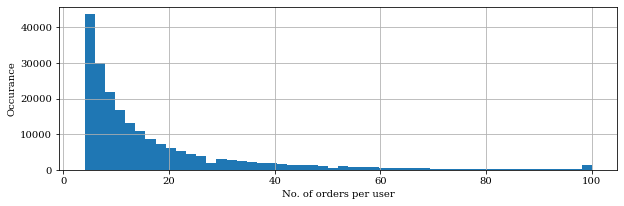

In [7]:
#Check how many times each user have ordered

#This method is too slow, takes about 18min to run
"""
order_no = np.zeros(total_user,dtype=int)
for i in range(1,total_user+1):
    subset = np.where(data_orders["user_id"] == i)
    order_no[i-1] = len(subset[0]) 
    #print(i, subset, order_no[i] )
"""

users_order = data_orders.groupby('user_id')['order_number'].aggregate('max').reset_index()
fig = plt.figure(1, figsize=(10,3))
plt.hist(users_order["order_number"], density=False, bins=50)  # density=False would make counts
plt.ylabel('Occurance')
plt.xlabel('No. of orders per user')
plt.grid()
print("Mode:", stats.mode(users_order["order_number"]), "Mean:",np.mean(users_order["order_number"]))


Max 30.0 Min: 0.0 Mode: ModeResult(mode=array([30.]), count=array([369323])) Mean: 11.114836226863012


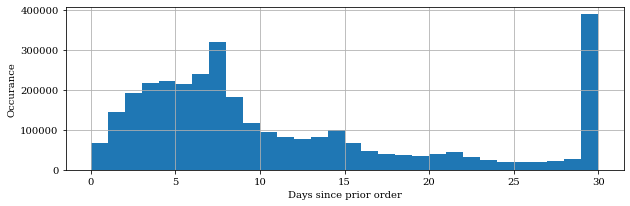

In [8]:
users_order_prior = data_orders.groupby('user_id')['days_since_prior_order'].aggregate('max').reset_index()
fig = plt.figure(1, figsize=(10,3))
plt.hist(data_orders["days_since_prior_order"], density=False, bins=30)  # density=False would make counts
plt.ylabel('Occurance')
plt.xlabel('Days since prior order')
plt.grid()
print("Max",np.max(data_orders["days_since_prior_order"]), "Min:", np.min(data_orders["days_since_prior_order"]), "Mode:", stats.mode(data_orders["days_since_prior_order"]), "Mean:",np.mean(data_orders["days_since_prior_order"]))


count_week [600905. 587478. 467260. 436972. 426339. 453368.]


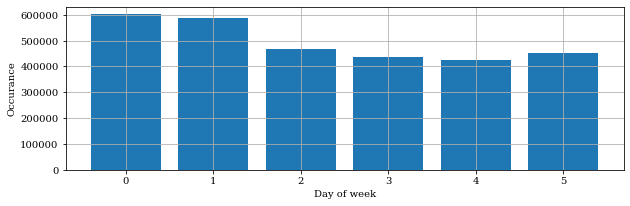

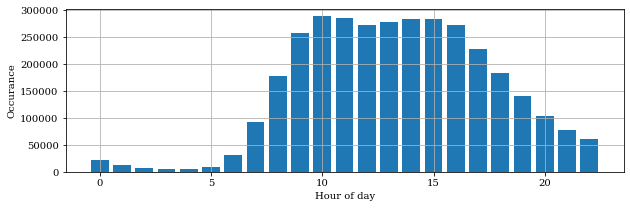

In [9]:
#Histogram of dow
fig = plt.figure(1, figsize=(10,3))
bins = np.arange(7)-0.5
arr = plt.hist(data_orders["order_dow"], density=False, bins=bins, rwidth=0.8)  # density=False would make counts
count_week = arr[0]
print("count_week",count_week)
plt.ylabel('Occurance')
plt.xlabel('Day of week')
plt.grid()

#histogram of hod
fig = plt.figure(2, figsize=(10,3))
bins = np.arange(24)-0.5
arr = plt.hist(data_orders["order_hour_of_day"], density=False, bins=bins, rwidth=0.8)  # density=False would make counts
count_hour = arr[0]
plt.ylabel('Occurance')
plt.xlabel('Hour of day')
plt.grid()

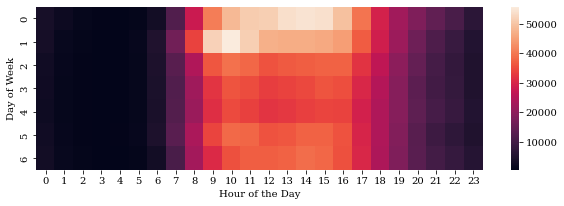

In [10]:
#Heatmap
fig = plt.figure(3, figsize=(10,3))
group_hour_dow = data_orders.groupby(['order_dow', 'order_hour_of_day'])['order_number'].aggregate('count').reset_index()
group_hour_dow = group_hour_dow.pivot('order_dow', 'order_hour_of_day', 'order_number')
sns.heatmap(group_hour_dow)

plt.ylabel('Day of Week')
plt.xlabel('Hour of the Day')
plt.show()

Number of records: 32434489
<bound method NDFrame.head of          order_id  product_id
0               2           9
1               3           8
2               4          13
3               5          26
4               6           3
...           ...         ...
3214869   3421079           1
3214870   3421080           9
3214871   3421081           7
3214872   3421082           7
3214873   3421083          10

[3214874 rows x 2 columns]>
Max 145 Min: 1 Mode: ModeResult(mode=array([5]), count=array([228330])) Mean: 10.088883421247614


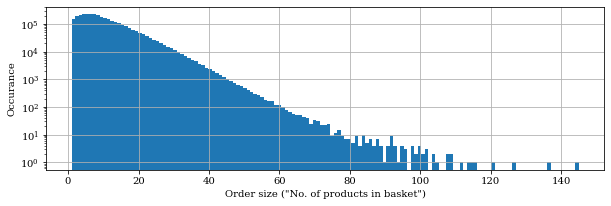

In [11]:
data_order_prior = pd.read_csv("order_products__prior.csv")
print(f"Number of records: {len(data_order_prior)}")
#data_order_prior.head()

order_size = data_order_prior.groupby('order_id')['product_id'].aggregate('count').reset_index()
print(order_size.head)

fig = plt.figure(1, figsize=(10,3))
plt.hist(order_size["product_id"], density=False, bins=145)  # density=False would make counts
plt.ylabel('Occurance')
plt.xlabel('Order size ("No. of products in basket")')
plt.yscale('log')
plt.grid()
print("Max",np.max(order_size["product_id"]), "Min:", np.min(order_size["product_id"]), "Mode:", stats.mode(order_size["product_id"]), "Mean:",np.mean(order_size["product_id"]))


In [12]:
data_order_train = pd.read_csv("order_products__train.csv")
print(f"Number of records: {len(data_order_train)}")
data_order_train.head()


Number of records: 1384617


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [13]:
#Compare the training set and the full set

data_type = data_orders.groupby('eval_set')['user_id'].nunique()
print(data_type)

#Double check to see if the count is correct 
N_test = data_orders[data_orders["eval_set"] == 'test'].shape[0]
N_prior = data_orders[data_orders["eval_set"] == 'prior'].shape[0]
N_train = data_orders[data_orders["eval_set"] == 'train'].shape[0]

print(N_test, N_prior, N_train)

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64
75000 3214874 131209


In [14]:
#prior : order_id = 2, user_id = 202279
#train : order_id = 1050357

#data_orders[data_orders["user_id"] == 202279 ]["order_id"]

#new_data = data_order_prior
#new_data["user_id"] = 

#new_data.head
#data_orders[data_orders["user_id"] == 202279]

#data_order_train[data_order_train["order_id"] == 1050357]


SyntaxError: ignored

In [15]:
#Pre-process the data

#Combine all prior and training data to form a big log, merge with data_orders by order_id
#Only use the 131209 users in the trainning set to train

log = pd.concat([pd.read_csv('order_products__prior.csv'), 
                 pd.read_csv('order_products__train.csv')], 
                ignore_index=1)
log = pd.merge(log, data_orders, on='order_id', how='left')

log.head

<bound method NDFrame.head of           order_id  product_id  add_to_cart_order  reordered  user_id  \
0                2       33120                  1          1   202279   
1                2       28985                  2          1   202279   
2                2        9327                  3          0   202279   
3                2       45918                  4          1   202279   
4                2       30035                  5          0   202279   
...            ...         ...                ...        ...      ...   
33819101   3421063       14233                  3          1   169679   
33819102   3421063       35548                  4          1   169679   
33819103   3421070       35951                  1          1   139822   
33819104   3421070       16953                  2          1   139822   
33819105   3421070        4724                  3          1   139822   

         eval_set  order_number  order_dow  order_hour_of_day  \
0           prior           

In [16]:
log.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')

In [20]:
X = log.drop(['add_to_cart_order', 'order_id', 'order_number','reordered','eval_set'], axis=1)
y = log['reordered']

In [21]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

In [ ]:
# predict the results
y_pred=clf.predict(X_test)